In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

<AxesSubplot:xlabel='date'>

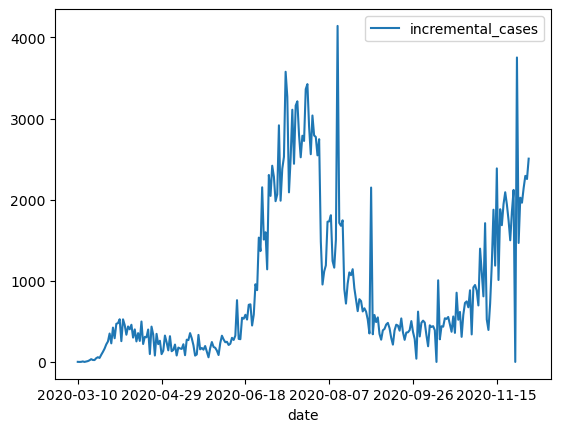

In [3]:
# get selected counties
miami = df[df.entity == 'Florida-Miami-Dade']
miami = miami[['date', 'incremental_cases']]
#miami.reset_index(inplace=True)
miami.plot(x='date', y='incremental_cases')


In [4]:
#need to differentiate twice to not be stationary
diffDf = miami.set_index('date')

statDF = diffDf.diff().diff()
firstVal = diffDf.diff(1).iloc[1,:].incremental_cases
firstDiff = diffDf.diff()

split = int(0.85 * len(statDF))
train = statDF.iloc[:split,:]
test = statDF.iloc[split:, :]
compareTest = diffDf.iloc[split:, :]

def fromTestDiffToActualInc(test, firstVal, secondVal):
    test.iloc[0,0] += firstVal
    test = test.cumsum()
    test.iloc[0,0] += secondVal
    return test.cumsum()

In [5]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)

In [17]:
order

(2, 2, 7)

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

train = train.loc[:, ['incremental_cases']].reset_index()
n_splits = 3

tscv = TimeSeriesSplit(n_splits=n_splits)

p_values = range(1,10,3)
d_values = [2]
q_values = range(1,10,3)

best_score, best_cfg = float("inf"), None

for train_index, val_index in tscv.split(train):
    train_data, val_data = train.loc[train_index, :], train.loc[val_index, :]

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                model = ARIMA(train_data.incremental_cases, order = order).fit()
                forecast = model.forecast(steps=val_data.shape[0])
                mse = mean_squared_error(val_data.incremental_cases, forecast)
                if mse < best_score:
                    best_score, best_cfg = mse, order

print(f'Best ARIMA parameters: {best_cfg} with MSE: {best_score}')

C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yshik\Anaconda3\lib\site-packages\stat

Best ARIMA parameters: (7, 2, 7) with MSE: 179558.94603520713


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-49800.843663252155


<AxesSubplot:title={'center':'ARIMA Predictions for Miami'}, xlabel='date'>

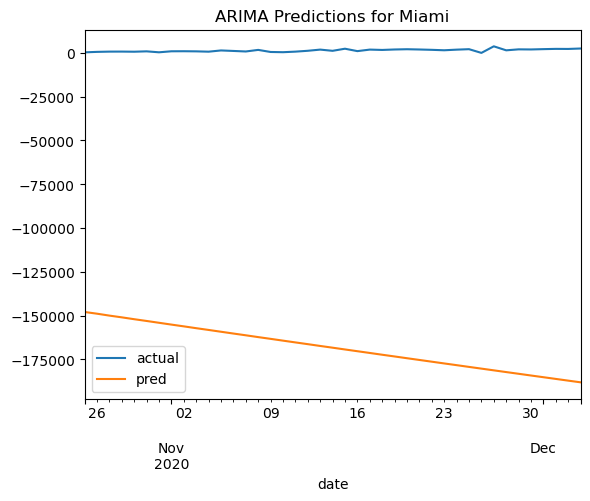

In [10]:
from sklearn.metrics import r2_score

model = ARIMA(train.incremental_cases, order=(7, 2, 7)).fit()
pred = model.forecast(steps=41)


predictTest = pd.DataFrame(pred)
predictTest.columns=['incremental_cases']

foo = pd.DataFrame(model.fittedvalues, columns=['incremental_cases'])
foo.iloc[1,0] = diffDf.diff().iloc[1,0]
foo = foo.cumsum()
firstVal = foo.iloc[-1,0].copy()

foo.iloc[0,0] = diffDf.iloc[0,0]
foo = foo.cumsum()
secondVal = foo.iloc[-1,0].copy()



fooooo = predictTest.copy()
finalIncrementPreds = fromTestDiffToActualInc(fooooo, firstVal, secondVal)



r2 = r2_score(miami.iloc[split:, :].incremental_cases, finalIncrementPreds)
print(r2)

prediction = pd.DataFrame({'actual':miami.iloc[split:, :].incremental_cases.reset_index(drop = True), 
              'pred':finalIncrementPreds.incremental_cases.reset_index(drop = True)})
prediction['date'] = pd.to_datetime(test.index)
prediction.plot(x = 'date', y = ['actual', 'pred'], title='ARIMA Predictions for Miami')

-203.890731437015


<AxesSubplot:title={'center':'ARIMA Predictions for Miami'}, xlabel='date'>

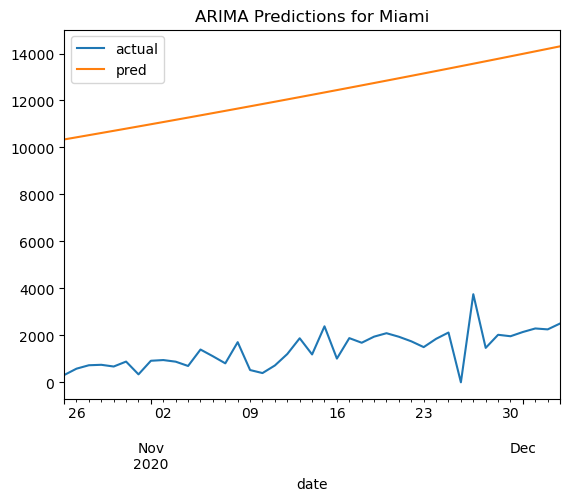

In [11]:
from sklearn.metrics import r2_score

model = ARIMA(train.incremental_cases).fit()
pred = model.forecast(steps=41)


predictTest = pd.DataFrame(pred)
predictTest.columns=['incremental_cases']

foo = pd.DataFrame(model.fittedvalues, columns=['incremental_cases'])
foo.iloc[1,0] = diffDf.diff().iloc[1,0]
foo = foo.cumsum()
firstVal = foo.iloc[-1,0].copy()

foo.iloc[0,0] = diffDf.iloc[0,0]
foo = foo.cumsum()
secondVal = foo.iloc[-1,0].copy()



fooooo = predictTest.copy()
finalIncrementPreds = fromTestDiffToActualInc(fooooo, firstVal, secondVal)



r2 = r2_score(miami.iloc[split:, :].incremental_cases, finalIncrementPreds)
print(r2)

prediction = pd.DataFrame({'actual':miami.iloc[split:, :].incremental_cases.reset_index(drop = True), 
              'pred':finalIncrementPreds.incremental_cases.reset_index(drop = True)})
prediction['date'] = pd.to_datetime(test.index)
prediction.plot(x = 'date', y = ['actual', 'pred'], title='ARIMA Predictions for Miami')